In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img=cv2.imread('/Users/roy/OneDrive/Courses/AI/WeChat Jump Bot/Code/screen.png',0)


In [56]:

edgemap = cv2.Canny(img, 50, 500)


In [30]:
def hough(edgemap):
    rows,cols=edgemap.shape
    theta_max = 180
    rho_max=np.floor(np.sqrt(rows**2 + cols**2)).astype(int)
    Hough=np.zeros((theta_max,rho_max))
    y_index,x_index=np.where(edgemap>0)
    count=0
    for y,x in zip(y_index,x_index):
        for theta in range(Hough.shape[0]):
            rho = int(x * np.cos(np.radians(theta)) + y * np.sin(np.radians(theta)))
            Hough[theta,rho] = Hough[theta,rho] + 1
    return Hough
    
def localMaximum(x,minDist, topK):
    row_offset1=np.round(minDist/2.0).astype(int)
    row_offset2=np.round(minDist/2.0).astype(int)
    col_offset1=np.round(minDist/2.0).astype(int)
    col_offset2=np.round(minDist/2.0).astype(int)
    
    rowindex=np.zeros(topK)
    colindex=np.zeros(topK)
    
    for i in range(1,topK+1):
        I_row,I_col = np.unravel_index(x.argmax(), x.shape)
        
        if I_row-row_offset1<0:
            row_offset1=I_row
        if I_row+row_offset2>x.shape[0]:
            row_offset2=x.shape[0]-I_row
        if I_col-col_offset1<0:
            col_offset1=I_col
        if I_col+col_offset2>x.shape[1]:
            col_offset2=x.shape[1]-I_col
        
        x[I_row-row_offset1:I_row+row_offset2,I_col-col_offset1:I_col+col_offset2]=0
        rowindex[i-1]=I_row
        colindex[i-1]=I_col       
    return rowindex,colindex

def polartoxy(thetalist,rholist):
    # y=round(rho/sind(theta)-x.*cotd(theta));
    k=-1.0*np.cos(np.radians(thetalist))/np.sin(np.radians(thetalist))
    b=rholist/np.sin(np.radians(thetalist))
    return k,b
    

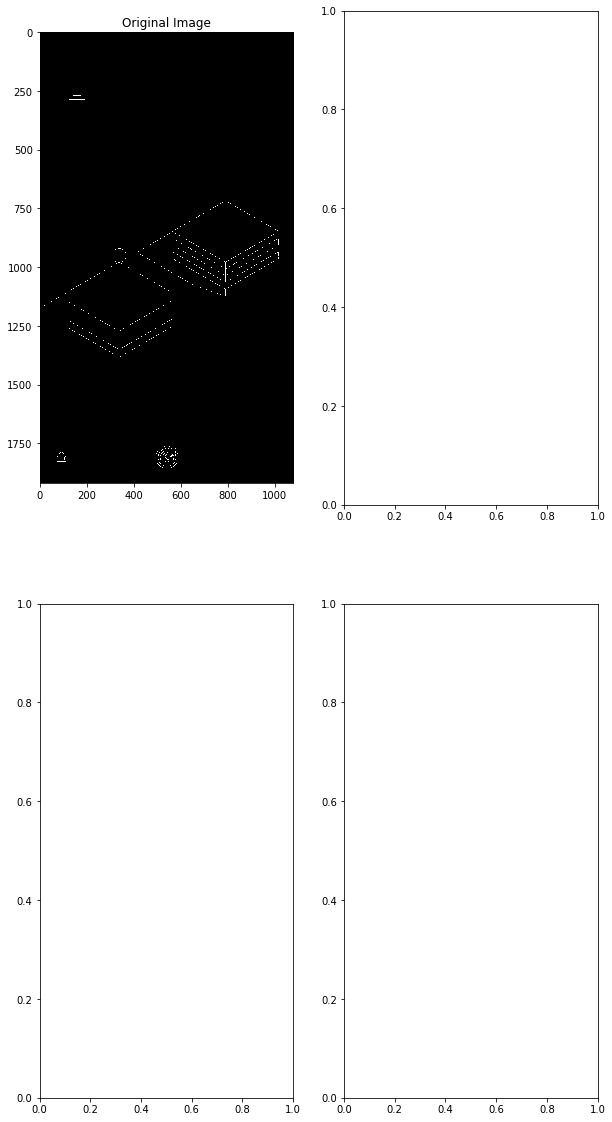

In [ ]:

acc=hough(edgemap)


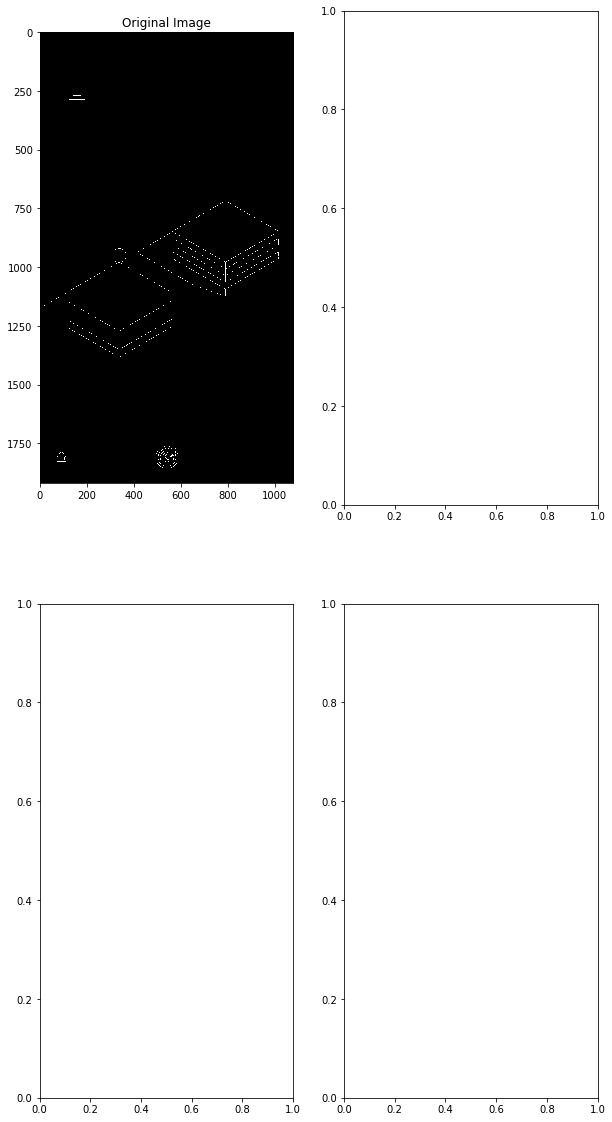

In [39]:

theta,rho=localMaximum(acc,7,3)
k,b=polartoxy(theta,rho)
# cv2.imwrite('/Users/roy/OneDrive/Courses/AI/WeChat Jump Bot/Code/H.png',acc)


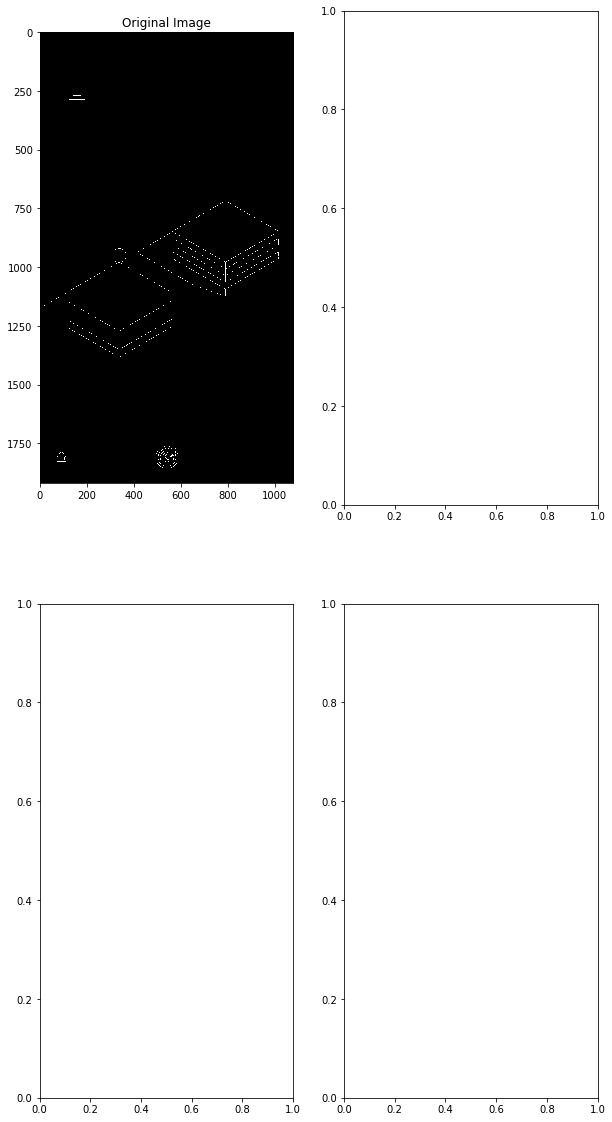

In [40]:
print(rho,theta)
print(k,b)


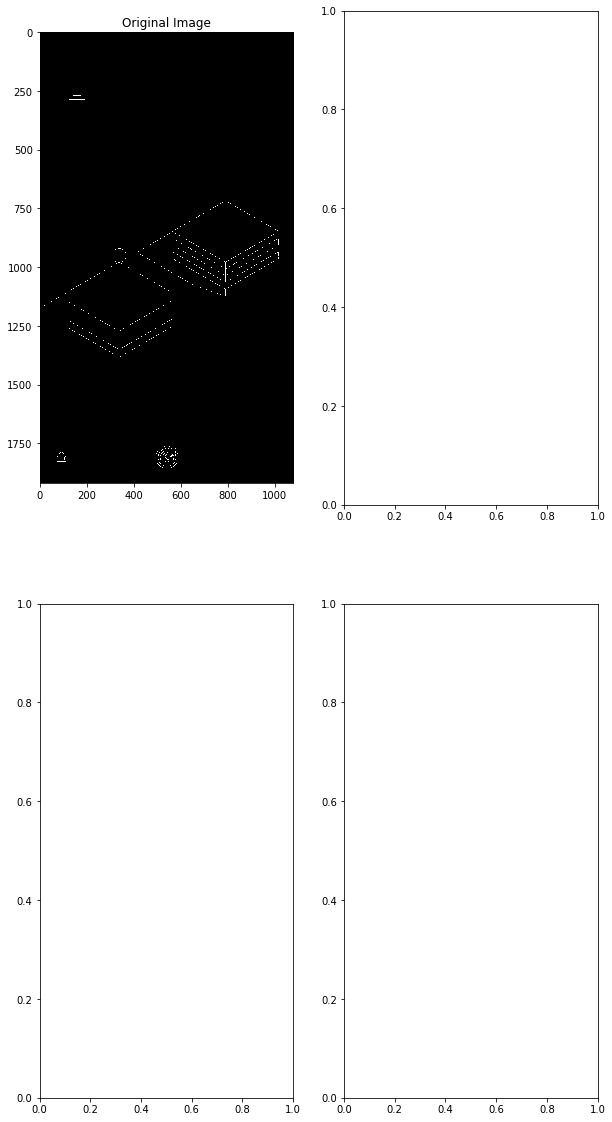

In [57]:

fig, axs = plt.subplots(2, 2, figsize=(10, 20))
axs[0, 0].imshow(edgemap, cmap=plt.cm.gray)
axs[0, 0].title.set_text('Original Image')
# axs[0, 1].imshow(bodytemplate,cmap=plt.cm.gray)
# axs[0, 1].title.set_text('Corrlation Image')
plt.show()
